# Dataset URL

# Problem Statement

# Importing Libraries

i am importing all the libraries which are going to be used in the following project in order use the built-in functions 

In [420]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

%matplotlib inline

# Exploring Dataset

I am using the pd.read_csv library to read the dataset 

In [421]:
arty  = pd.read_csv (r'F:\Train\Train.csv')

Here im displaying the upper part of the dataset by using .head() built-in library

In [422]:
arty.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Im using .tail() built-in function to display the lower part of the dataset

In [423]:
arty.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Here im using .shape() and .length() method to display the shape and length of the dataset

In [424]:
print ("The shape of the dataset is: "),arty.shape

The shape of the dataset is: 


(None, (614, 13))

In [425]:
print ("The length of the dataset is: "),len(arty)

The length of the dataset is: 


(None, 614)

Here im using the .info() built-in function to display the information regarding the datset which includes 
the datatypes of the columns, Non null counts, indexes and column names

In [426]:
arty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Im using built-in functions .isnull() and .sum() to display the total sum of the null variables in the dataset 

In [427]:
arty.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here im using the built-in function .describe() to display the detailed discription of the dataset

In [428]:
arty.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Pre Processing 

## Handle Numerical missing data

Here im trying to fill the missing numerical values by using the built-in function .fillna() in the dataset by taking the mean of the given values in the dataset using the .mean() function

In [429]:
arty ['LoanAmount'] = arty ['LoanAmount'].fillna (arty['LoanAmount'].mean())
arty ['Loan_Amount_Term'] = arty ['Loan_Amount_Term'].fillna (arty['Loan_Amount_Term'].mean())
arty ['Credit_History'] = arty ['Credit_History'].fillna (arty['Credit_History'].mean())

After filling the numerical values here im using .isnull() function to check the null numerical values and then show the sum of the null numerical values by using .sum() function 

In [430]:
arty.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## Handle Categorical Missing Data

Here im trying to fill the categoical values using the built-in function .fillna() in the dataset by taking the mode of the given values in the dataset using the .mode() function

In [431]:
arty['Gender'].mode()[0]

'Male'

In [432]:
arty['Gender'] = arty ['Gender'].fillna(arty['Gender'].mode()[0])
arty['Married'] = arty ['Married'].fillna(arty['Married'].mode()[0])
arty['Dependents'] = arty ['Dependents'].fillna(arty['Dependents'].mode()[0])
arty['Self_Employed'] = arty ['Self_Employed'].fillna(arty['Self_Employed'].mode()[0])

After filling the categorical values here im using .isnull() function to check the null categorical values and then show the sum of the null categoricla values by using .sum() function 

In [433]:
arty.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

## Categorical Data

Here im trying to explore the categorical data columns to analyze the ratio of the the enteries each column contains 

<AxesSubplot:xlabel='Gender', ylabel='count'>

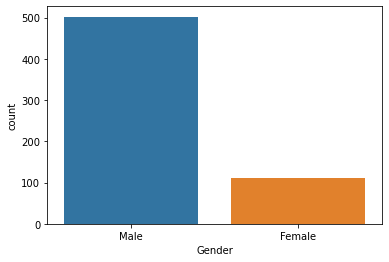

In [434]:
sns.countplot (arty['Gender'])

<AxesSubplot:xlabel='Education', ylabel='count'>

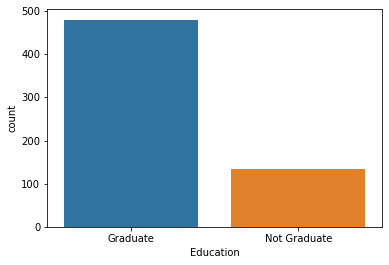

In [435]:
sns.countplot (arty['Education'])

<AxesSubplot:xlabel='Married', ylabel='count'>

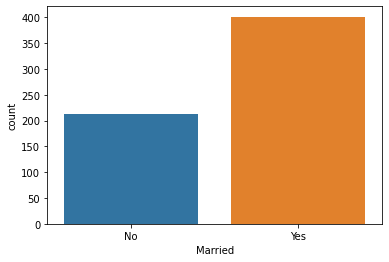

In [436]:
sns.countplot (arty['Married'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

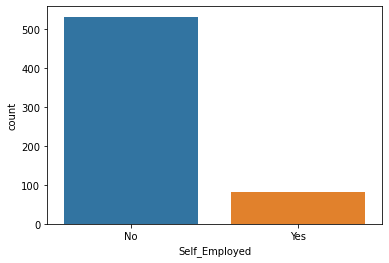

In [437]:
sns.countplot(arty['Self_Employed'])

## Numerical Data

Here im trying to explore the numerical data to analyze the graphs and see how the graphs demonstrates all the 
entries which are in the columns 

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

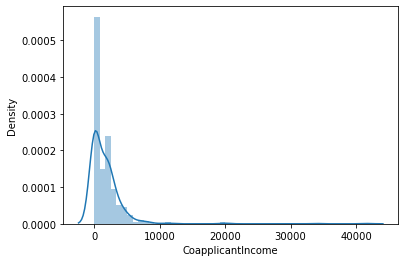

In [438]:
sns.distplot(arty.CoapplicantIncome)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

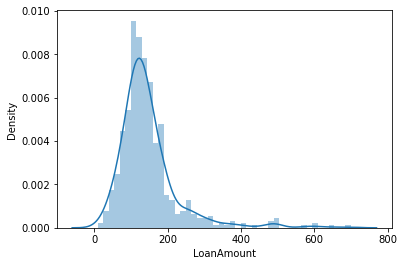

In [439]:
sns.distplot (arty.LoanAmount)

### Creating New Column

Now im trying to create a new column 'Total_income' and storing the values of two columns 'ApplicantIncome' and 'CoapplicantIncome' because both of the column values are the same 

In [440]:
arty['Total_income'] = arty['ApplicantIncome'] + arty['CoapplicantIncome']

In [441]:
arty.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


### Data Transformation

Now here im trying to transformi the data using the .log() built-in function to calculate the natural logrithemic value and plotting it 
using .distplot() graphical representation

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

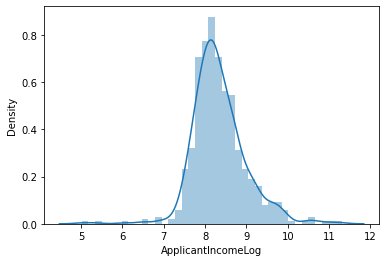

In [442]:
arty['ApplicantIncomeLog'] = np.log(arty['ApplicantIncome'])
sns.distplot (arty.ApplicantIncomeLog)

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

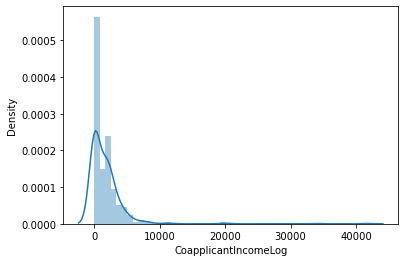

In [443]:
arty['CoapplicantIncomeLog'] = np.floor(arty['CoapplicantIncome'])
sns.distplot (arty.CoapplicantIncomeLog)

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

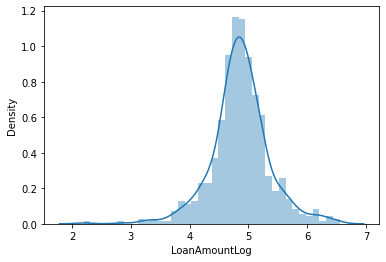

In [444]:
arty['LoanAmountLog'] = np.log(arty['LoanAmount'])
sns.distplot (arty['LoanAmountLog'])

<AxesSubplot:xlabel='Loan_Amount_Term_log', ylabel='Density'>

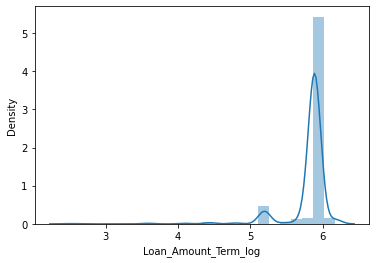

In [445]:
arty['Loan_Amount_Term_log'] = np.log(arty['Loan_Amount_Term'])
sns.distplot (arty['Loan_Amount_Term_log'])

Now im dropping all the orignal columns because now we have the natural logrithemic values of all the existing columns.

In [446]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_income', 'Loan_ID', 'CoapplicantIncomeLog']
arty = arty.drop(columns = cols, axis = 1)

Checking the the value counts of the column 'Loan_Status' by using built-in function .value_counts()

In [447]:
arty.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Here im using the built-in function pd.get_dummies() to get the dummy values for the columns and assigning them to new values 
and after that using the built-in function pd.concat() to concatenate all the variables and then dropping the orignal columns

In [448]:
d1 = pd.get_dummies(arty['Gender'], drop_first= True)
d2 = pd.get_dummies(arty['Married'], drop_first= True)
d3 = pd.get_dummies(arty['Dependents'], drop_first= True)
d4 = pd.get_dummies(arty['Education'], drop_first= True)
d5 = pd.get_dummies(arty['Self_Employed'], drop_first= True)
d6 = pd.get_dummies(arty['Property_Area'], drop_first= True)



df1 = pd.concat([arty, d1, d2, d3, d4, d5, d6], axis = 1)
arty=df1

cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
arty = arty.drop(columns=cols, axis=1)

# Split Datasets

Here im splitting the dataset into two parts ( test(y) and train(x) )

In [449]:
x = arty.drop (columns = ['Loan_Status'], axis = 1)
y = arty['Loan_Status']

In [450]:
x

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,8.674026,4.986426,5.886104,1,0,0,0,0,0,0,0,1
1,1.0,8.430109,4.852030,5.886104,1,1,1,0,0,0,0,0,0
2,1.0,8.006368,4.189655,5.886104,1,1,0,0,0,0,1,0,1
3,1.0,7.856707,4.787492,5.886104,1,1,0,0,0,1,0,0,1
4,1.0,8.699515,4.948760,5.886104,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,7.972466,4.262680,5.886104,0,0,0,0,0,0,0,0,0
610,1.0,8.320205,3.688879,5.192957,1,1,0,0,1,0,0,0,0
611,1.0,8.996157,5.533389,5.886104,1,1,1,0,0,0,0,0,1
612,1.0,8.933664,5.231109,5.886104,1,1,0,1,0,0,0,0,1


Here im changing the the entries of the target column which is 'Loan_Status' from categorical value to numeric so that it can be used for classification algorithms

In [451]:
d = {'N': 0, 'Y' : 1}
y = arty['Loan_Status'] = arty['Loan_Status'].map(d).fillna(arty['Loan_Status'])

In [452]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

Splitting the dataset into two (parts train and test) 

In [453]:
x_learn, x_eval, y_learn, y_eval = train_test_split(x, y, test_size=0.25, random_state=42)

# Random Forest Classifier

## Hyperparameter selection using Grid Search for RFC

Selection the best parameter for the RFC classifier to predict the best results 

In [454]:
ranf = RandomForestClassifier() 
params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gs = GridSearchCV(rf, param_grid= params, cv = 5,scoring = "roc_auc",verbose=1)
gs.fit(x_learn, y_learn)
print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
0.773787265974766
RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=200,
                       random_state=1000)
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


## Training RFC after hyperparameter tuning

After Hyperparameter selection, training the RFC classifier to present the best results

<AxesSubplot:>

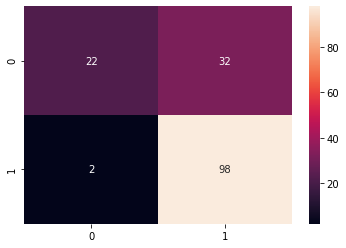

In [455]:
ranf =RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto',
                       n_estimators=500,random_state=1000)
ranf.fit(x_learn, y_learn)
y_predict_ranf = ranf.predict(x_eval)

# confusion_matrix
cm = confusion_matrix(y_eval, y_predict_ranf)
sns.heatmap(cm, annot=True, fmt="d")

## Performance of RFC

After training the RFC classifier, checking the performance of the classifier on the given dataset

In [456]:
print('Accuracy',accuracy_score((y_eval), y_predict_ranf) * 100)
print('Precision',precision_score(y_eval, y_predict_ranf, average='macro') * 100)
print('Recall',recall_score(y_eval, y_predict_ranf, average='macro') * 100)

Accuracy 77.92207792207793
Precision 83.52564102564102
Recall 69.37037037037037


# Decision Tree Classifier

## Hyperparameter selection using Grid Search for DTC

Selection the best parameter for the DTC classifier to predict the best results 

In [457]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x_learn, y_learn)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [458]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=8, max_features='auto',
                       random_state=1024)

## Training DTC after Hyperparameter Tuning

After Hyperparameter selection, training the DTC classifier to present the best results

<AxesSubplot:>

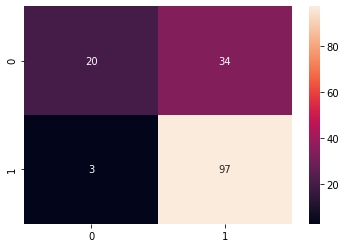

In [459]:
dtree =DecisionTreeClassifier(ccp_alpha=0.01, criterion='gini', max_depth=8,
                       max_features='auto', random_state=1024)
dtree.fit(x_learn, y_learn)
y_predict_dtree = dtree.predict(x_eval)
# confusion_matrix
cm = confusion_matrix(y_eval, y_predict_dtree)
sns.heatmap(cm, annot=True, fmt="d")


## Performance of DTC

After training the DTC classifier, checking the performance of the classifier on the given dataset

In [460]:
print('Accuracy',accuracy_score((y_eval), y_predict_dtree) * 100)
print('Precision',precision_score(y_eval, y_predict_dtree, average='macro') * 100)
print('Recall',recall_score(y_eval, y_predict_dtree, average='macro') * 100)

Accuracy 75.97402597402598
Precision 80.501161632924
Recall 67.01851851851852


# KNN Classifier

## Hyperparameter selection using Grid Search for KNN 

Selection the best parameter for the KNN classifier to predict the best results 

In [461]:
params = {'n_neighbors':range(1,20),"metric":["euclidean", "manhattan"],
              'algorithm' :['ball_tree','kd_tree','brute']
        
             }
knn=KNeighborsClassifier()
gs = GridSearchCV(knn, param_grid= params, cv = 5,scoring = "roc_auc",verbose=1)
gs.fit(x_learn, y_learn)
print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 114 candidates, totalling 570 fits
0.7237664707977208
KNeighborsClassifier(algorithm='ball_tree', metric='manhattan')
{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 5}


## Training KNN after Hyperparameter Tuning 

After Hyperparameter selection, training the KNN classifier to present the best results

<AxesSubplot:>

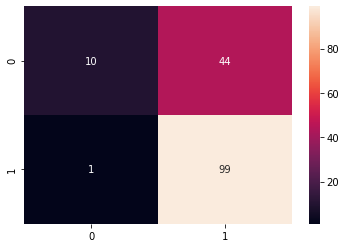

In [462]:
knn = KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=19)
knn.fit(x_learn, y_learn)
y_predict_knn = knn.predict(x_eval)
# confusion_matrix
cm = confusion_matrix(y_eval, y_predict_knn)
sns.heatmap(cm, annot=True, fmt="d")

## Performance of KNN

After training the KNN classifier, checking the performance of the classifier on the given dataset

In [463]:
print('Accuracy',accuracy_score((y_eval), y_predict_knn)* 100)
print('Precision',precision_score(y_eval, y_predict_knn, average='macro') * 100)
print('Recall',recall_score(y_eval, y_predict_knn, average='macro') * 100)

Accuracy 70.77922077922078
Precision 80.06993006993007
Recall 58.75925925925925


# Logistic Regression

## Hyperparameter selection using Grid Search for LR

Selection the best parameter for the LR classifier to predict the best results 

In [464]:
# Creating the model:
loreg = LogisticRegression() 
params = {'C': np.logspace(-3,3,7), 'penalty': ['l1', 'l2']}

gs = GridSearchCV(loreg, param_grid= params, cv = 5,scoring = "roc_auc",verbose=1)
gs.fit(x_learn, y_learn)
print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
0.7755827101139602
LogisticRegression(C=0.1)
{'C': 0.1, 'penalty': 'l2'}


## Training LR after Hyperparameter Tuning 

After Hyperparameter selection, training the LR classifier to present the best results

<AxesSubplot:>

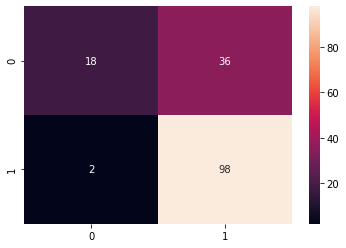

In [465]:
loreg =LogisticRegression(C=0.1,penalty='l2')
loreg.fit(x_learn, y_learn)
y_predict_loreg = loreg.predict(x_eval)
# confusion_matrix
cm = confusion_matrix(y_eval, y_predict_loreg)
sns.heatmap(cm, annot=True, fmt="d")

## Performance of LR

After training the LR classifier, checking the performance of the classifier on the given dataset

In [466]:
print('Accuracy',accuracy_score((y_eval), y_predict_loreg) * 100)
print('Precision',precision_score(y_eval, y_predict_loreg, average='macro') * 100)
print('Recall',recall_score(y_eval, y_predict_loreg, average='macro') * 100)

Accuracy 75.32467532467533
Precision 81.56716417910448
Recall 65.66666666666666


# SVM

## Hyperparameter Selection using Grid Search for SVM

Selection the best parameter for the SVM classifier to predict the best results 

In [467]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
gs = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gs.fit(x_learn, y_learn)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.707 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [468]:
print(gs.best_params_)
  
print(gs.best_estimator_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


## Training SVM after Hyperparapeter Tuning 

After Hyperparameter selection, training the SVM classifier to present the best results

<AxesSubplot:>

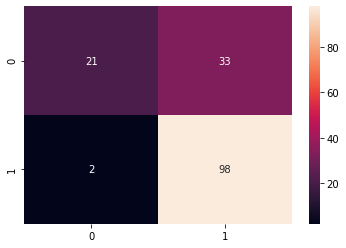

In [469]:
clf = svm.SVC(kernel='linear') 
clf.fit(x_learn, y_learn)
y_pred_svm = clf.predict(x_eval)

cm = confusion_matrix(y_eval, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d")

## Performance of SVM

After training the SVM classifier, checking the performance of the classifier on the given dataset

In [470]:
print('Accuracy: ',accuracy_score((y_eval), y_pred_svm) * 100)

Accuracy:  77.27272727272727


In [471]:
# print classification report
print(classification_report(y_eval, y_pred_svm))

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



# ROC Curve

I have made a ROC Curve and the prupose of making the ROC Curve is to
analyze the overall diagonistic performance of a test set and can be used to
comare more than two test sets and after that i have graphically shown the 
ROC Curve

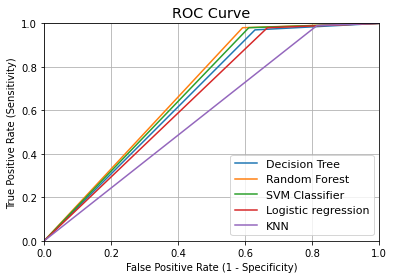

In [472]:
fpr_dtree, tpr_dtree, thresholds_dtree = metrics.roc_curve(y_eval, y_predict_dtree)
fpr_ranf, tpr_ranf, thresholds_ranf = metrics.roc_curve(y_eval, y_predict_ranf)
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(y_eval, y_pred_svm)
fpr_loreg, tpr_loreg, thresholds_loreg = metrics.roc_curve(y_eval, y_predict_loreg)
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_eval, y_predict_knn)

plt.plot(fpr_dtree, tpr_dtree, label="Decision Tree")
plt.plot(fpr_ranf, tpr_ranf, label="Random Forest")
plt.plot(fpr_svm, tpr_svm, label="SVM Classifier")
plt.plot(fpr_loreg, tpr_loreg, label="Logistic regression")
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True)